In [7]:
import pandas as pd
import sqlalchemy
from urllib import parse

In [14]:
user = 'encore'
password = '123'
host='192.168.0.95'
port = 3306
database = 'encore'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

In [15]:
try:
    with engine.connect() as connection:
        print("Database connection sucessful!")
except Exception as e:
    print(f"Database connection failed: {e}")

Database connection sucessful!


In [16]:
#큰 용량의 파일
kbo =pd.read_sql_query("select * from kbo", con=engine)

In [17]:
kbo

,index,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
0,0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
1,1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761
2,2,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715
3,3,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937
4,4,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,911,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642
909,912,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095
910,913,하영민,No.50,1995년 05월 07일,투수(우투우타),광주수창초-진흥중-진흥고-히어로즈,15000만원,8000만원,14 넥센 2차 1라운드 4순위,14넥센,키움 히어로즈,183,74,22.096808
911,914,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104,28.211806


In [19]:
#각 컬럼별 결측치 확인
kbo.isnull().sum()

index     0
선수명       0
등번호       0
생년월일      0
포지션       0
경력        0
입단 계약금    0
연봉        0
지명순위      0
입단년도      0
team      0
신장        0
체중        0
BMI       0
dtype: int64

In [20]:
display(kbo.head(3))
display(kbo.tail(3))

,index,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
0,0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
1,1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761
2,2,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715


,index,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
910,913,하영민,No.50,1995년 05월 07일,투수(우투우타),광주수창초-진흥중-진흥고-히어로즈,15000만원,8000만원,14 넥센 2차 1라운드 4순위,14넥센,키움 히어로즈,183,74,22.096808
911,914,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104,28.211806
912,915,후라도,No.75,1996년 01월 30일,투수(우투우타),파나마 San Judas Tadeo(고),,1200000달러,23 키움 자유선발,23키움,키움 히어로즈,187,109,31.170465


In [21]:
kbo.columns

Index(['index', '선수명', '등번호', '생년월일', '포지션', '경력', '입단 계약금', '연봉', '지명순위',
       '입단년도', 'team', '신장', '체중', 'BMI'],
      dtype='object')

In [24]:
kbo.drop(['index'], axis=1, inplace=True)

In [25]:
kbo

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761
2,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715
3,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937
4,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642
909,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095
910,하영민,No.50,1995년 05월 07일,투수(우투우타),광주수창초-진흥중-진흥고-히어로즈,15000만원,8000만원,14 넥센 2차 1라운드 4순위,14넥센,키움 히어로즈,183,74,22.096808
911,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104,28.211806


In [28]:
#시리즈는 1차원, DataFrame은 2차원 / 컬럼명 2개 이상을 가져오고 싶을 때는 DataFrame형식 사용 / 대괄호 2개 
kbo[['선수명', '등번호']]

,선수명,등번호
0,강동훈,No.034
1,강민제,No.038
2,강이준,No.36
3,고명성,No.
4,고종욱,No.57
...,...,...
908,주승우,No.30
909,최주환,No.53
910,하영민,No.50
911,헤이수스,No.54


In [29]:
#컬럼 순서 변경 
kbo = kbo[['BMI','선수명', '등번호', '생년월일', '포지션', '경력', '입단 계약금', '연봉', '지명순위',
       '입단년도', 'team', '신장', '체중', ]].copy()

In [30]:
kbo

,BMI,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중
0,28.634039,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98
1,25.029761,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82
2,23.822715,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86
3,21.461937,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68
4,24.515595,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,25.308642,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82
909,23.301095,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73
910,22.096808,하영민,No.50,1995년 05월 07일,투수(우투우타),광주수창초-진흥중-진흥고-히어로즈,15000만원,8000만원,14 넥센 2차 1라운드 4순위,14넥센,키움 히어로즈,183,74
911,28.211806,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104


In [32]:
kbo.team.value_counts()

team
한화 이글스      97
NC 다이노스     96
KT 위즈       95
두산 베어스      94
KIA 타이거즈    93
롯데 자이언츠     87
삼성 라이온즈     87
SSG 랜더스     87
LG 트윈스      85
키움 히어로즈     63
고양 히어로즈     17
상무          12
Name: count, dtype: int64

In [33]:
kbo.team.value_counts().sum()

np.int64(913)

In [34]:
#kbo.team.value_counts() / kbo.team.value_counts().sum() * 100
#집계 비율 
kbo.team.value_counts(normalize=True)

team
한화 이글스      0.106243
NC 다이노스     0.105148
KT 위즈       0.104053
두산 베어스      0.102957
KIA 타이거즈    0.101862
롯데 자이언츠     0.095290
삼성 라이온즈     0.095290
SSG 랜더스     0.095290
LG 트윈스      0.093100
키움 히어로즈     0.069003
고양 히어로즈     0.018620
상무          0.013143
Name: proportion, dtype: float64

In [35]:
kbo.loc[ : , 'team']

0      KIA 타이거즈
1      KIA 타이거즈
2      KIA 타이거즈
3      KIA 타이거즈
4      KIA 타이거즈
         ...   
908     키움 히어로즈
909     키움 히어로즈
910     키움 히어로즈
911     키움 히어로즈
912     키움 히어로즈
Name: team, Length: 913, dtype: object

In [39]:
kbo.loc[kbo.team == "고양 히어로즈", :]

,BMI,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중
849,24.691358,김주훈,No.02,2003년 06월 25일,투수(좌투좌타),울산대현초-부산신정중-용마고-동원과학기술대,7000만원,3000만원,24 키움 5라운드 49순위,,고양 히어로즈,180,80
850,27.472527,김준형,No.93,2002년 07월 12일,투수(우투우타),서울이수초-성남중-성남고,8000만원,3700만원,21 키움 2차 2라운드 19순위,21키움,고양 히어로즈,182,91
854,22.448015,노운현,No.59,2003년 06월 22일,투수(우언우타),(부산북구리틀)-센텀중-경남고,6000만원,3000만원,22 키움 2차 4라운드 32순위,22키움,고양 히어로즈,184,76
861,26.880935,박승호,No.05,2005년 03월 24일,투수(우투우타),(익산시리틀)-전라중-군산상일고,3000만원,3000만원,24 키움 10라운드 99순위,,고양 히어로즈,185,92
866,25.127831,박채울,No.03,2004년 11월 20일,외야수(우투우타),부평초(인천서구리틀)-재능중-충암고,4000만원,3000만원,24 키움 8라운드 79순위,,고양 히어로즈,185,86
867,26.589183,백진수,No.105,2003년 02월 15일,투수(우투우타),광주대성초-무등중-광주제일고,7000만원,,22 키움 2차 3라운드 26순위,,고양 히어로즈,191,97
869,27.776930,변헌성,No.103,2004년 05월 18일,포수(우투우타),원동초(오산시리틀)-대원중-유신고,4000만원,3000만원,23 키움 9라운드 86순위,,고양 히어로즈,181,91
870,24.535124,서유신,No.98,2000년 08월 17일,내야수(우투우타),광주수창초-충장중-화순고-원광대,3000만원,3000만원,23 키움 11라운드 106순위,,고양 히어로즈,176,76
873,23.566632,송재선,No.9,2000년 06월 30일,외야수(우투우타),수유초-충암중-신일고-한일장신대,7000만원,3100만원,23 키움 5라운드 46순위,23키움,고양 히어로즈,176,73
876,27.064052,신효수,No.08,2000년 12월 24일,포수(우투우타),서울청구초-휘문중-휘문고-연세대,,1500만원,24 키움 육성선수,,고양 히어로즈,173,81


In [40]:
kbo.loc[kbo.team == "고양 히어로즈", 'team'] = '키움 히어로즈'

In [41]:
kbo.team.value_counts(normalize=True)

team
한화 이글스      0.106243
NC 다이노스     0.105148
KT 위즈       0.104053
두산 베어스      0.102957
KIA 타이거즈    0.101862
롯데 자이언츠     0.095290
삼성 라이온즈     0.095290
SSG 랜더스     0.095290
LG 트윈스      0.093100
키움 히어로즈     0.087623
상무          0.013143
Name: proportion, dtype: float64

In [42]:
kbo['신장'].value_counts().sort_index()

신장
163      2
165      2
168      1
169      1
170      3
171      3
172      6
173     11
174     13
175     22
176     23
177     41
178     61
179     18
180     80
181     71
182     63
183     97
184     60
185    100
186     44
187     48
188     48
189     16
190     29
191     14
192     11
193     11
194      4
195      2
196      4
197      1
198      2
203      1
Name: count, dtype: int64

<Axes: xlabel='신장'>

/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


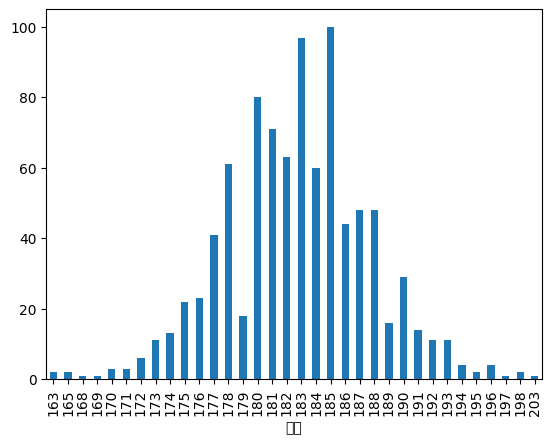

In [46]:
kbo['신장'].value_counts().sort_index().plot(kind ='bar')

In [47]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [48]:
font_list

['/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',
 '/usr/share/fonts/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight

In [49]:
print([matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list])

['NanumSquare', 'Ubuntu Mono', 'NanumBarunGothic YetHangul', 'DejaVu Sans', 'NanumSquareRound', 'NanumGothic Eco', 'NanumBarunGothic', 'NanumSquare', 'DejaVu Sans Mono', 'Ubuntu', 'NanumGothic', 'Ubuntu', 'Ubuntu', 'Ubuntu Mono', 'NanumSquareRound', 'NanumBarunGothic', 'NanumGothic', 'NanumBarunGothic', 'NanumGothic', 'DejaVu Sans', 'Ubuntu', 'NanumMyeongjo YetHangul', 'Nanum Pen Script', 'Ubuntu', 'NanumMyeongjo Eco', 'NanumBarunpen', 'Nanum Brush Script', 'NanumMyeongjo', 'NanumSquare', 'Ubuntu Mono', 'NanumMyeongjo Eco', 'NanumGothic Eco', 'NanumMyeongjo', 'NanumGothic', 'Ubuntu', 'Nanum Pen Script', 'NanumSquare_ac', 'NanumGothic Eco', 'NanumMyeongjo Eco', 'NanumMyeongjo', 'Ubuntu', 'NanumSquare_ac', 'Nanum Brush Script', 'NanumSquare_ac', 'NanumGothic', 'Ubuntu', 'NanumSquare', 'NanumMyeongjo', 'NanumGothic', 'Ubuntu Mono', 'DejaVu Serif', 'Ubuntu Condensed', 'DejaVu Serif', 'NanumSquareRound', 'NanumBarunGothic', 'NanumGothic Eco', 'DejaVu Sans Mono', 'NanumGothicCoding', 'NanumS

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'NanumGothic'

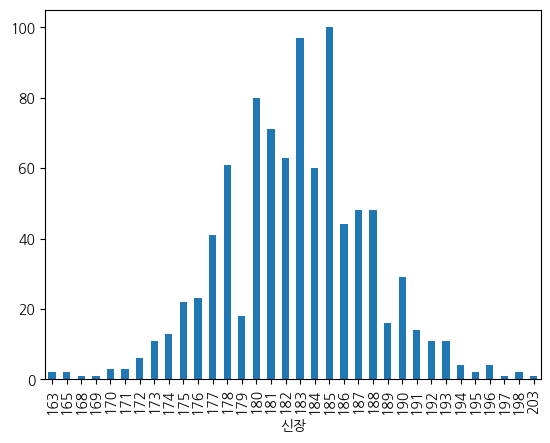

In [52]:
kbo['신장'].value_counts().sort_index().plot(kind ='bar')
plt.show()

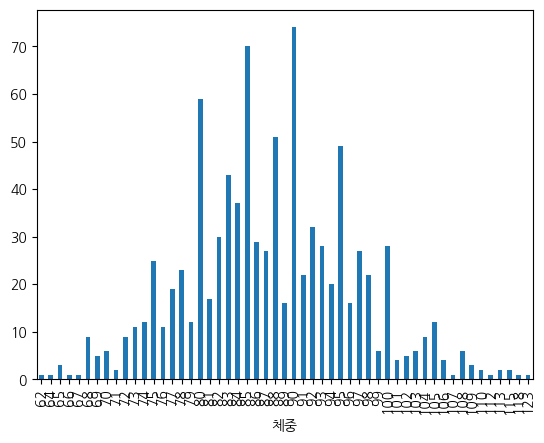

In [53]:
kbo['체중'].value_counts().sort_index().plot(kind ='bar')
plt.show()

In [62]:
#컬럼 순서 변경 
kbo = kbo[['선수명', '등번호', '생년월일', '포지션', '경력', '입단 계약금', '연봉', '지명순위',
       '입단년도', 'team', '신장', '체중', 'BMI']].copy()

In [63]:
kbo

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761
2,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715
3,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937
4,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642
909,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095
910,하영민,No.50,1995년 05월 07일,투수(우투우타),광주수창초-진흥중-진흥고-히어로즈,15000만원,8000만원,14 넥센 2차 1라운드 4순위,14넥센,키움 히어로즈,183,74,22.096808
911,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104,28.211806


In [64]:
용병

,BMI,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중
31,22.282477,네일,No.40,1993년 02월 08일,투수(우투우타),미국 Alabama at Birmingham(대),200000달러,350000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,193,83
32,26.038781,라우어,No.66,1995년 06월 03일,투수(좌투우타),미국 Kent State(대),50000달러,300000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,190,94
35,32.824138,박상준,No.05,2001년 08월 21일,내야수(좌투좌타),석교초-세광중-세광고-강릉영동대,,,22 KIA 육성선수,,KIA 타이거즈,178,104
43,26.312811,소크라테스,No.30,1992년 09월 06일,외야수(좌투좌타),도미니카 Liceo Cacique Enriquillo(고),100000달러,500000달러,22 KIA 자유선발,22KIA,KIA 타이거즈,188,93
44,25.484765,스타우트,No.2,1993년 03월 27일,투수(좌투좌타),미국,,45000달러,24 KIA 부상 대체 외국인선수,24KIA,KIA 타이거즈,190,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,23.427738,하트,No.30,1992년 11월 23일,투수(좌투좌타),미국 Indiana(대),200000달러,500000달러,24 NC 자유선발,24NC,NC 다이노스,196,90
855,29.860551,도슨,No.27,1995년 05월 19일,외야수(우투좌타),미국 Ohio Licking Heights(고),,550000달러,23 키움 자유선발,23키움,키움 히어로즈,183,100
867,26.589183,백진수,No.105,2003년 02월 15일,투수(우투우타),광주대성초-무등중-광주제일고,7000만원,,22 키움 2차 3라운드 26순위,,키움 히어로즈,191,97
911,28.211806,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104


In [65]:
국내선수 = kbo[kbo.연봉.str.find("만원") > -1].copy()
용병 = kbo[~kbo.연봉.str.find("만원") > -1].copy()

In [66]:
용병

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
31,네일,No.40,1993년 02월 08일,투수(우투우타),미국 Alabama at Birmingham(대),200000달러,350000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,193,83,22.282477
32,라우어,No.66,1995년 06월 03일,투수(좌투우타),미국 Kent State(대),50000달러,300000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,190,94,26.038781
35,박상준,No.05,2001년 08월 21일,내야수(좌투좌타),석교초-세광중-세광고-강릉영동대,,,22 KIA 육성선수,,KIA 타이거즈,178,104,32.824138
43,소크라테스,No.30,1992년 09월 06일,외야수(좌투좌타),도미니카 Liceo Cacique Enriquillo(고),100000달러,500000달러,22 KIA 자유선발,22KIA,KIA 타이거즈,188,93,26.312811
44,스타우트,No.2,1993년 03월 27일,투수(좌투좌타),미국,,45000달러,24 KIA 부상 대체 외국인선수,24KIA,KIA 타이거즈,190,92,25.484765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,하트,No.30,1992년 11월 23일,투수(좌투좌타),미국 Indiana(대),200000달러,500000달러,24 NC 자유선발,24NC,NC 다이노스,196,90,23.427738
855,도슨,No.27,1995년 05월 19일,외야수(우투좌타),미국 Ohio Licking Heights(고),,550000달러,23 키움 자유선발,23키움,키움 히어로즈,183,100,29.860551
867,백진수,No.105,2003년 02월 15일,투수(우투우타),광주대성초-무등중-광주제일고,7000만원,,22 키움 2차 3라운드 26순위,,키움 히어로즈,191,97,26.589183
911,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104,28.211806


In [67]:
국내선수

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761
2,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715
3,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937
4,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,주성원,No.25,2000년 08월 30일,외야수(우투우타),부산대연초(남구리틀)-부산신정중-개성고,8000만원,3500만원,19 넥센 2차 3라운드 24순위,19키움,키움 히어로즈,182,95,28.680111
907,주승빈,No.91,2004년 03월 06일,투수(좌투좌타),구운초(수원권선구리틀)-영동중-서울고,5000만원,3000만원,22 키움 2차 5라운드 46순위,,키움 히어로즈,181,84,25.640243
908,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642
909,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095


In [70]:
import re
p = re.compile("[0-9]+")
p.findall("만원")

[]

In [73]:
국내선수['연봉(만원)'] = 국내선수['연봉'].apply(lambda x : int(p.findall(x)[0]))

In [74]:
국내선수

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI,연봉(만원)
0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039,3000
1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761,3000
2,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715,3000
3,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937,3100
4,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,주성원,No.25,2000년 08월 30일,외야수(우투우타),부산대연초(남구리틀)-부산신정중-개성고,8000만원,3500만원,19 넥센 2차 3라운드 24순위,19키움,키움 히어로즈,182,95,28.680111,3500
907,주승빈,No.91,2004년 03월 06일,투수(좌투좌타),구운초(수원권선구리틀)-영동중-서울고,5000만원,3000만원,22 키움 2차 5라운드 46순위,,키움 히어로즈,181,84,25.640243,3000
908,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642,3200
909,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095,65000


In [75]:
국내선수.drop(['연봉'], axis=1, inplace=True)

In [76]:
국내선수

,선수명,등번호,생년월일,포지션,경력,입단 계약금,지명순위,입단년도,team,신장,체중,BMI,연봉(만원)
0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039,3000
1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761,3000
2,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715,3000
3,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937,3100
4,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,주성원,No.25,2000년 08월 30일,외야수(우투우타),부산대연초(남구리틀)-부산신정중-개성고,8000만원,19 넥센 2차 3라운드 24순위,19키움,키움 히어로즈,182,95,28.680111,3500
907,주승빈,No.91,2004년 03월 06일,투수(좌투좌타),구운초(수원권선구리틀)-영동중-서울고,5000만원,22 키움 2차 5라운드 46순위,,키움 히어로즈,181,84,25.640243,3000
908,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642,3200
909,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095,65000


In [78]:
국내선수.groupby(['team'])[['연봉(만원)']].mean().sort_values(by=['연봉(만원)'], ascending=False)

,연봉(만원)
team,
LG 트윈스,12426.923077
SSG 랜더스,12325.925926
롯데 자이언츠,11950.000000
한화 이글스,11534.117647
KT 위즈,11525.287356
삼성 라이온즈,11304.938272
KIA 타이거즈,10161.445783
두산 베어스,10155.000000
NC 다이노스,9031.034483


In [79]:
국내선수.sort_values(by = ['연봉(만원)'], ascending=False).head(5)

,선수명,등번호,생년월일,포지션,경력,입단 계약금,지명순위,입단년도,team,신장,체중,BMI,연봉(만원)
662,류현진,No.99,1987년 03월 25일,투수(좌투우타),창영초-동산중-동산고-(대전대)-한화-LA다저스-토론토,25000만원,06 한화 2차 1라운드 2순위,06한화,한화 이글스,190,113,31.301939,250000
213,박동원,No.27,1990년 04월 07일,포수(우투우타),양정초-개성중-개성고-히어로즈-상무-히어로즈-키움-KIA,6000만원,09 히어로즈 2차 3라운드 19순위,09히어로즈,LG 트윈스,178,92,29.036738,250000
96,구자욱,No.5,1993년 02월 12일,외야수(우투좌타),본리초-경복중-대구고-삼성-상무,13000만원,12 삼성 2라운드 12순위,12삼성,삼성 라이온즈,189,75,20.996053,200000
368,고영표,No.1,1991년 09월 16일,투수(우언우타),광주대성초-광주동성중-화순고-동국대,13000만원,14 KT 2차 1라운드 10순위,14KT,KT 위즈,187,88,25.165146,200000
289,김재환,No.32,1988년 09월 22일,외야수(우투좌타),영랑초-상인천중-인천고-두산-상무,15000만원,08 두산 2차 1라운드 4순위,08두산,두산 베어스,183,90,26.874496,150000


In [85]:
국내선수.groupby(['team'])[['연봉(만원)']].agg(['mean', 'median', 'min', 'max', 'count', 'var'])

연봉(만원)                                          
                  mean  median   min     max count           var
team                                                            
KIA 타이거즈  10161.445783  3600.0  3000  100000    83  2.958734e+08
KT 위즈     11525.287356  3500.0  3000  200000    87  6.104791e+08
LG 트윈스    12426.923077  3250.0  3000  250000    78  9.668386e+08
NC 다이노스    9031.034483  3200.0  3000  100000    87  2.593982e+08
SSG 랜더스   12325.925926  3100.0  3000  110000    81  5.307454e+08
두산 베어스    10155.000000  3300.0  3000  150000    80  3.902202e+08
롯데 자이언츠   11950.000000  3800.0  3000  135000    82  5.754043e+08
삼성 라이온즈   11304.938272  4100.0  3000  200000    81  5.857810e+08
상무         5950.000000  3200.0  3000   19000    12  3.119727e+07
키움 히어로즈    8468.421053  3300.0  1500   68000    76  2.015643e+08
한화 이글스    11534.117647  3400.0  3000  250000    85  8.916004e+08

In [92]:
국내선수.groupby(['team'])[['생년월일']].agg(['min'])

,생년월일
,min
team,
KIA 타이거즈,1983년 12월 16일
KT 위즈,1984년 03월 31일
LG 트윈스,1984년 07월 31일
NC 다이노스,1988년 03월 18일
SSG 랜더스,1982년 07월 13일
두산 베어스,1985년 03월 21일
롯데 자이언츠,1986년 02월 25일
삼성 라이온즈,1982년 07월 15일


In [94]:
국내선수.sort_values(by = ['생년월일'], ascending=True).groupby('team').first()

,선수명,등번호,생년월일,포지션,경력,입단 계약금,지명순위,입단년도,신장,체중,BMI,연봉(만원)
team,,,,,,,,,,,,
KIA 타이거즈,최형우,No.34,1983년 12월 16일,외야수(우투좌타),진북초-전주동중-전주고-삼성-경찰-삼성,5000만원,02 삼성 2차 6라운드 48순위,02삼성,180,106,32.716049,100000
KT 위즈,박경수,No.6,1984년 03월 31일,내야수(우투우타),미성초-성남중-성남고-LG,43000만원,03 LG 1차,03LG,178,80,25.249337,20000
LG 트윈스,허도환,No.30,1984년 07월 31일,포수(우투우타),서울학동초-서울이수중-서울고-단국대-두산-히어로즈-한화-SK-KT,,03 두산 2차 7라운드 56순위,07두산,176,90,29.054752,10000
NC 다이노스,손아섭,No.31,1988년 03월 18일,외야수(우투좌타),양정초-개성중-부산고-롯데,8000만원,07 롯데 2차 4라운드 29순위,07롯데,174,84,27.744748,50000
SSG 랜더스,추신수,No.17,1982년 07월 13일,외야수(좌투좌타),부산수영초-부산중-부산고-SK,,07 해외진출선수 특별지명,00시애틀,180,97,29.938272,3000
두산 베어스,김재호,No.52,1985년 03월 21일,내야수(우투우타),남정초-중앙중-중앙고-두산-상무,20000만원,04 두산 1차,04두산,181,75,22.893074,30000
롯데 자이언츠,전준우,No.8,1986년 02월 25일,외야수(우투우타),흥무초-경주중-경주고-건국대-롯데-경찰,10000만원,08 롯데 2차 2라운드 15순위,08롯데,184,98,28.946125,130000
삼성 라이온즈,오승환,No.21,1982년 07월 15일,투수(우투우타),도신초-우신중-경기고-단국대-삼성-한신-세인트루이스-토론토-콜로라도,18000만원,05 삼성 2차 1라운드 5순위,05삼성,178,93,29.352355,40000
상무,김재웅,No.3,1998년 10월 22일,투수(좌투좌타),금교초(남양주리틀)-자양중-덕수고-키움-상무,5000만원,17 넥센 2차 6라운드 57순위,19키움,171,86,29.410759,19000


In [172]:
국내선수.sort_values(by = ['연봉(만원)'], ascending=False).groupby(['team']).first()

,선수명,등번호,생년월일,포지션,경력,입단 계약금,지명순위,입단년도,신장,체중,BMI,연봉(만원),나이,연차
team,,,,,,,,,,,,,,
KIA 타이거즈,최형우,No.34,1983년 12월 16일,외야수(우투좌타),진북초-전주동중-전주고-삼성-경찰-삼성,5000만원,02 삼성 2차 6라운드 48순위,02삼성,180,106,32.716049,100000,41,22.0
KT 위즈,고영표,No.1,1991년 09월 16일,투수(우언우타),광주대성초-광주동성중-화순고-동국대,13000만원,14 KT 2차 1라운드 10순위,14KT,187,88,25.165146,200000,33,10.0
LG 트윈스,박동원,No.27,1990년 04월 07일,포수(우투우타),양정초-개성중-개성고-히어로즈-상무-히어로즈-키움-KIA,6000만원,09 히어로즈 2차 3라운드 19순위,09히어로즈,178,92,29.036738,250000,34,15.0
NC 다이노스,박민우,No.2,1993년 02월 06일,내야수(우투좌타),마포초(용산구리틀)-선린중-휘문고,16000만원,12 NC 1라운드 9순위,12NC,185,80,23.374726,100000,31,12.0
SSG 랜더스,박종훈,No.50,1991년 08월 13일,투수(우언우타),군산중앙초-군산중-군산상고-SK-상무-SK,10000만원,10 SK 2라운드 9순위,10SK,186,90,26.014568,110000,33,14.0
두산 베어스,김재환,No.32,1988년 09월 22일,외야수(우투좌타),영랑초-상인천중-인천고-두산-상무,15000만원,08 두산 2차 1라운드 4순위,08두산,183,90,26.874496,150000,36,16.0
롯데 자이언츠,박세웅,No.21,1995년 11월 30일,투수(우투우타),대구경운초-경운중-경북고-KT,20000만원,14 KT 1차,14KT,182,85,25.661152,135000,29,10.0
삼성 라이온즈,구자욱,No.5,1993년 02월 12일,외야수(우투좌타),본리초-경복중-대구고-삼성-상무,13000만원,12 삼성 2라운드 12순위,12삼성,189,75,20.996053,200000,31,12.0
상무,김재웅,No.3,1998년 10월 22일,투수(좌투좌타),금교초(남양주리틀)-자양중-덕수고-키움-상무,5000만원,17 넥센 2차 6라운드 57순위,19키움,171,86,29.410759,19000,26,5.0


In [97]:
from datetime import date, datetime, timedelta
datetime.now() - datetime.strptime("2000년 11월 23일", "%Y년 %m월 %d일")

datetime.timedelta(days=8758, seconds=41938, microseconds=148226)

In [98]:
(datetime.now() - datetime.strptime("2000년 11월 23일", "%Y년 %m월 %d일")).days / 365

23.994520547945207

In [99]:
datetime.strptime("2000년 11월 23일", "%Y년 %m월 %d일").year

2000

In [100]:
2024 - datetime.strptime("2000년 11월 23일", "%Y년 %m월 %d일").year

24

In [104]:
국내선수['생년월일'].apply(lambda x : 2024 - datetime.strptime("2000년 11월 23일", "%Y년 %m월 %d일").year)

0      24
1      24
2      24
3      24
4      24
       ..
906    24
907    24
908    24
909    24
910    24
Name: 생년월일, Length: 832, dtype: int64

In [105]:
국내선수['나이'] = 국내선수['생년월일'].apply(lambda x : 
                   datetime.now().year - datetime.strptime(x, "%Y년 %m월 %d일").year)

In [111]:
국내선수.groupby(['team'])[['나이']].agg(['mean', 'median', 'var', 'std', 'min', 'max', 'count'])

나이                                          
               mean median        var       std min max count
team                                                         
KIA 타이거즈  25.819277   25.0  24.905965  4.990588  19  41    83
KT 위즈     26.000000   25.0  26.906977  5.187194  19  40    87
LG 트윈스    25.525641   25.0  20.746087  4.554787  19  40    78
NC 다이노스   24.850575   24.0  19.175087  4.378937  19  36    87
SSG 랜더스   25.987654   25.0  32.462346  5.697574  19  42    81
두산 베어스    25.425000   25.0  21.968987  4.687109  19  39    80
롯데 자이언츠   26.134146   25.0  29.105239  5.394927  19  38    82
삼성 라이온즈   26.592593   25.0  35.519444  5.959819  19  42    81
상무        21.916667   21.0   5.537879  2.353270  20  26    12
키움 히어로즈   24.618421   23.5  26.399123  5.138008  19  39    76
한화 이글스    26.023529   25.0  26.761345  5.173137  19  42    85

In [109]:
국내선수.sort_values(by=['나이'], ascending=False).groupby('team').first()

,선수명,등번호,생년월일,포지션,경력,입단 계약금,지명순위,입단년도,신장,체중,BMI,연봉(만원),나이
team,,,,,,,,,,,,,
KIA 타이거즈,최형우,No.34,1983년 12월 16일,외야수(우투좌타),진북초-전주동중-전주고-삼성-경찰-삼성,5000만원,02 삼성 2차 6라운드 48순위,02삼성,180,106,32.716049,100000,41
KT 위즈,박경수,No.6,1984년 03월 31일,내야수(우투우타),미성초-성남중-성남고-LG,43000만원,03 LG 1차,03LG,178,80,25.249337,20000,40
LG 트윈스,허도환,No.30,1984년 07월 31일,포수(우투우타),서울학동초-서울이수중-서울고-단국대-두산-히어로즈-한화-SK-KT,,03 두산 2차 7라운드 56순위,07두산,176,90,29.054752,10000,40
NC 다이노스,손아섭,No.31,1988년 03월 18일,외야수(우투좌타),양정초-개성중-부산고-롯데,8000만원,07 롯데 2차 4라운드 29순위,07롯데,174,84,27.744748,50000,36
SSG 랜더스,추신수,No.17,1982년 07월 13일,외야수(좌투좌타),부산수영초-부산중-부산고-SK,,07 해외진출선수 특별지명,00시애틀,180,97,29.938272,3000,42
두산 베어스,김재호,No.52,1985년 03월 21일,내야수(우투우타),남정초-중앙중-중앙고-두산-상무,20000만원,04 두산 1차,04두산,181,75,22.893074,30000,39
롯데 자이언츠,진해수,No.31,1986년 06월 26일,투수(좌투좌타),동삼초-경남중-부경고-KIA-상무-KIA-SK-LG,4000만원,05 KIA 2차 7라운드 50순위,06KIA,187,85,24.307244,15000,38
삼성 라이온즈,오승환,No.21,1982년 07월 15일,투수(우투우타),도신초-우신중-경기고-단국대-삼성-한신-세인트루이스-토론토-콜로라도,18000만원,05 삼성 2차 1라운드 5순위,05삼성,178,93,29.352355,40000,42
상무,김재웅,No.3,1998년 10월 22일,투수(좌투좌타),금교초(남양주리틀)-자양중-덕수고-키움-상무,5000만원,17 넥센 2차 6라운드 57순위,19키움,171,86,29.410759,19000,26


In [110]:
국내선수[(국내선수['입단년도'] == '')]

,선수명,등번호,생년월일,포지션,경력,입단 계약금,지명순위,입단년도,team,신장,체중,BMI,연봉(만원),나이
0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039,3000,24
1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761,3000,19
12,김도월,No.02,2004년 04월 03일,내야수(우투우타),화곡초-영남중-서울고,3000만원,23 KIA 9라운드 82순위,,KIA 타이거즈,188,80,22.634676,3000,20
15,김민수,No.04,2000년 04월 05일,외야수(우투좌타),부산수영초-경남중-경남고,,19 KIA 2차 7라운드 70순위,,KIA 타이거즈,186,87,25.147416,3000,24
24,김재현,No.010,2000년 12월 02일,내야수(우투좌타),광주화정초-건대부중-경기고-송원대,3000만원,23 KIA 10라운드 92순위,,KIA 타이거즈,176,81,26.149277,3000,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,신효수,No.08,2000년 12월 24일,포수(우투우타),서울청구초-휘문중-휘문고-연세대,,24 키움 육성선수,,키움 히어로즈,173,81,27.064052,1500,24
878,안겸,No.104,2004년 06월 15일,포수(우투우타),가양초(강서구리틀)-강남중-배재고,3000만원,23 키움 10라운드 96순위,,키움 히어로즈,181,83,25.335002,3000,20
891,이우현,No.01,2005년 11월 27일,투수(우투우타),배양초(화성동탄리틀)-안산중앙중-비봉고,10000만원,24 키움 3라운드 24순위,,키움 히어로즈,183,80,23.888441,3000,19
897,이호열,No.102,2004년 11월 17일,내야수(우투우타),(남양주리틀)-구리인창중-라온고,4000만원,23 키움 8라운드 76순위,,키움 히어로즈,180,80,24.691358,3000,20


In [113]:
datetime.now().year- 2000

24

In [114]:
국내선수.loc[~(국내선수['입단년도'] == ''), '연차'] =  \
     국내선수.loc[~(국내선수['입단년도'] == ''), '입단년도'].apply(lambda x : 
                                        datetime.now().year - 2000 - int(p.findall(x)[0]))

In [116]:
국내선수['연차'].agg(['mean', 'median', 'var', 'std', 'min', 'max', 'count'])

mean        6.159652
median      5.000000
var        27.375637
std         5.232173
min         0.000000
max        24.000000
count     689.000000
Name: 연차, dtype: float64

In [122]:
용병 = 용병[(용병.연봉 != '')].copy()

In [123]:
용병

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
31,네일,No.40,1993년 02월 08일,투수(우투우타),미국 Alabama at Birmingham(대),200000달러,350000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,193,83,22.282477
32,라우어,No.66,1995년 06월 03일,투수(좌투우타),미국 Kent State(대),50000달러,300000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,190,94,26.038781
43,소크라테스,No.30,1992년 09월 06일,외야수(좌투좌타),도미니카 Liceo Cacique Enriquillo(고),100000달러,500000달러,22 KIA 자유선발,22KIA,KIA 타이거즈,188,93,26.312811
44,스타우트,No.2,1993년 03월 27일,투수(좌투좌타),미국,,45000달러,24 KIA 부상 대체 외국인선수,24KIA,KIA 타이거즈,190,92,25.484765
46,알드레드,No.64,1996년 07월 25일,투수(좌투좌타),미국 Cincinnati(대),25000달러,300000달러,24 KIA 부상 대체 외국인선수,24KIA,KIA 타이거즈,191,93,25.492722
86,크로우,No.,1994년 09월 09일,투수(우투우타),미국 South Carolina(대),200000달러,600000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,185,108,31.555880
124,디아즈,No.0,1996년 11월 19일,내야수(좌투좌타),도미니카 Daniel Smith(고),,50000달러,24 삼성 자유선발,24삼성,삼성 라이온즈,188,105,29.708013
125,레예스,No.43,1996년 11월 02일,투수(우투우타),도미니카 Melida Altagracia Baez(고),100000달러,500000달러,24 삼성 자유선발,24삼성,삼성 라이온즈,198,113,28.823589
128,맥키넌,No.24,1994년 12월 15일,내야수(우투우타),미국 Hartford(대),100000달러,900000달러,24 삼성 자유선발,24삼성,삼성 라이온즈,188,101,28.576279
175,카데나스,No.,1997년 10월 10일,외야수(우투우타),미국 California State(대),,327000달러,24 삼성 자유선발,24삼성,삼성 라이온즈,185,83,24.251278


In [127]:
용병['연봉(만원)']  = 용병['연봉'].apply(lambda x : int(p.findall(x)[0]) * 1410 / 10000)

In [128]:
용병

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI,연봉(만원)
31,네일,No.40,1993년 02월 08일,투수(우투우타),미국 Alabama at Birmingham(대),200000달러,350000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,193,83,22.282477,49350.0
32,라우어,No.66,1995년 06월 03일,투수(좌투우타),미국 Kent State(대),50000달러,300000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,190,94,26.038781,42300.0
43,소크라테스,No.30,1992년 09월 06일,외야수(좌투좌타),도미니카 Liceo Cacique Enriquillo(고),100000달러,500000달러,22 KIA 자유선발,22KIA,KIA 타이거즈,188,93,26.312811,70500.0
44,스타우트,No.2,1993년 03월 27일,투수(좌투좌타),미국,,45000달러,24 KIA 부상 대체 외국인선수,24KIA,KIA 타이거즈,190,92,25.484765,6345.0
46,알드레드,No.64,1996년 07월 25일,투수(좌투좌타),미국 Cincinnati(대),25000달러,300000달러,24 KIA 부상 대체 외국인선수,24KIA,KIA 타이거즈,191,93,25.492722,42300.0
86,크로우,No.,1994년 09월 09일,투수(우투우타),미국 South Carolina(대),200000달러,600000달러,24 KIA 자유선발,24KIA,KIA 타이거즈,185,108,31.555880,84600.0
124,디아즈,No.0,1996년 11월 19일,내야수(좌투좌타),도미니카 Daniel Smith(고),,50000달러,24 삼성 자유선발,24삼성,삼성 라이온즈,188,105,29.708013,7050.0
125,레예스,No.43,1996년 11월 02일,투수(우투우타),도미니카 Melida Altagracia Baez(고),100000달러,500000달러,24 삼성 자유선발,24삼성,삼성 라이온즈,198,113,28.823589,70500.0
128,맥키넌,No.24,1994년 12월 15일,내야수(우투우타),미국 Hartford(대),100000달러,900000달러,24 삼성 자유선발,24삼성,삼성 라이온즈,188,101,28.576279,126900.0
175,카데나스,No.,1997년 10월 10일,외야수(우투우타),미국 California State(대),,327000달러,24 삼성 자유선발,24삼성,삼성 라이온즈,185,83,24.251278,46107.0


In [129]:
국내선수['연봉(만원)'].mean()

np.float64(10820.79326923077)

In [131]:
용병['연봉(만원)'].mean()

np.float64(91492.6046511628)

In [132]:
용병.team.value_counts()

team
KIA 타이거즈    6
두산 베어스      6
삼성 라이온즈     5
한화 이글스      5
SSG 랜더스     4
LG 트윈스      4
NC 다이노스     4
KT 위즈       3
롯데 자이언츠     3
키움 히어로즈     3
Name: count, dtype: int64

In [133]:
국내선수.신장.mean()

np.float64(182.359375)

In [134]:
용병.신장.mean()

np.float64(187.7674418604651)

In [142]:
#expand=True 데이터프레임으로 보여줘
#국내선수.경력.str.split("-", expand=True)
선수경력 = pd.concat([국내선수[['선수명' , 'team', '등번호']], 국내선수.경력.str.split("-", expand=True)], axis = 1)

In [143]:
선수경력

,선수명,team,등번호,0,1,2,3,4,5,6,7,8,9
0,강동훈,KIA 타이거즈,No.034,천안남산초,청주중,청주고,중앙대,None,None,None,None,None,None
1,강민제,KIA 타이거즈,No.038,군산중앙초,군산중,군산상일고,None,None,None,None,None,None,None
2,강이준,KIA 타이거즈,No.36,발산초,덕수중,구리인창고,KIA,상무,None,None,None,None,None
3,고명성,KIA 타이거즈,No.,군산남초,군산남중,군산상고,KT,None,None,None,None,None,None
4,고종욱,KIA 타이거즈,No.57,역삼초,대치중,경기고,한양대,히어로즈,상무,히어로즈,SK,SSG,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,주성원,키움 히어로즈,No.25,부산대연초(남구리틀),부산신정중,개성고,None,None,None,None,None,None,None
907,주승빈,키움 히어로즈,No.91,구운초(수원권선구리틀),영동중,서울고,None,None,None,None,None,None,None
908,주승우,키움 히어로즈,No.30,송추초(의정부리틀),영동중,서울고,성균관대,None,None,None,None,None,None
909,최주환,키움 히어로즈,No.53,학강초,광주동성중,광주동성고,두산,상무,두산,SK,SSG,None,None


In [144]:
선수경력[0].value_counts()

0
부산수영초             19
송정동초              15
가동초               14
양정초               14
광주대성초             14
                  ..
서울도곡초(남양주리틀)       1
부성초(천안유소년리틀)       1
장산초(부산동래마린스리틀)     1
서울상수초              1
대림초                1
Name: count, Length: 332, dtype: int64

In [146]:
선수경력.rename(columns = {0:'초등학교', 1:'중학교', 2:'고등학교'}, inplace = True)

In [147]:
선수경력

,선수명,team,등번호,초등학교,중학교,고등학교,3,4,5,6,7,8,9
0,강동훈,KIA 타이거즈,No.034,천안남산초,청주중,청주고,중앙대,None,None,None,None,None,None
1,강민제,KIA 타이거즈,No.038,군산중앙초,군산중,군산상일고,None,None,None,None,None,None,None
2,강이준,KIA 타이거즈,No.36,발산초,덕수중,구리인창고,KIA,상무,None,None,None,None,None
3,고명성,KIA 타이거즈,No.,군산남초,군산남중,군산상고,KT,None,None,None,None,None,None
4,고종욱,KIA 타이거즈,No.57,역삼초,대치중,경기고,한양대,히어로즈,상무,히어로즈,SK,SSG,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,주성원,키움 히어로즈,No.25,부산대연초(남구리틀),부산신정중,개성고,None,None,None,None,None,None,None
907,주승빈,키움 히어로즈,No.91,구운초(수원권선구리틀),영동중,서울고,None,None,None,None,None,None,None
908,주승우,키움 히어로즈,No.30,송추초(의정부리틀),영동중,서울고,성균관대,None,None,None,None,None,None
909,최주환,키움 히어로즈,No.53,학강초,광주동성중,광주동성고,두산,상무,두산,SK,SSG,None,None


In [151]:
선수경력 = 선수경력[['선수명', 'team', '등번호', '초등학교', '중학교', '고등학교']].copy()

In [152]:
선수경력

,선수명,team,등번호,초등학교,중학교,고등학교
0,강동훈,KIA 타이거즈,No.034,천안남산초,청주중,청주고
1,강민제,KIA 타이거즈,No.038,군산중앙초,군산중,군산상일고
2,강이준,KIA 타이거즈,No.36,발산초,덕수중,구리인창고
3,고명성,KIA 타이거즈,No.,군산남초,군산남중,군산상고
4,고종욱,KIA 타이거즈,No.57,역삼초,대치중,경기고
...,...,...,...,...,...,...
906,주성원,키움 히어로즈,No.25,부산대연초(남구리틀),부산신정중,개성고
907,주승빈,키움 히어로즈,No.91,구운초(수원권선구리틀),영동중,서울고
908,주승우,키움 히어로즈,No.30,송추초(의정부리틀),영동중,서울고
909,최주환,키움 히어로즈,No.53,학강초,광주동성중,광주동성고


In [154]:
국내선수.set_index('team')

,선수명,등번호,생년월일,포지션,경력,입단 계약금,지명순위,입단년도,신장,체중,BMI,연봉(만원),나이,연차
team,,,,,,,,,,,,,,
KIA 타이거즈,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,24 KIA 5라운드 46순위,,185,98,28.634039,3000,24,NaN
KIA 타이거즈,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,24 KIA 9라운드 86순위,,181,82,25.029761,3000,19,NaN
KIA 타이거즈,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,17 KIA 2차 4라운드 34순위,19KIA,190,86,23.822715,3000,26,5.0
KIA 타이거즈,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,18 KT 2차 4라운드 31순위,18KT,178,68,21.461937,3100,25,6.0
KIA 타이거즈,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,11 넥센 3라운드 19순위,11넥센,184,83,24.515595,15000,35,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
키움 히어로즈,주성원,No.25,2000년 08월 30일,외야수(우투우타),부산대연초(남구리틀)-부산신정중-개성고,8000만원,19 넥센 2차 3라운드 24순위,19키움,182,95,28.680111,3500,24,5.0
키움 히어로즈,주승빈,No.91,2004년 03월 06일,투수(좌투좌타),구운초(수원권선구리틀)-영동중-서울고,5000만원,22 키움 2차 5라운드 46순위,,181,84,25.640243,3000,20,NaN
키움 히어로즈,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,22 키움 1차,22키움,180,82,25.308642,3200,24,2.0


In [155]:
kbo3 = kbo.set_index("선수명").copy()

In [156]:
kbo3.loc['강동훈' : '강이준', : ]

,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
선수명,,,,,,,,,,,,
강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761
강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715


In [158]:
#선수명이 중복되는 것들을 알려줘 / True면 중복 
#kbo.선수명.duplicated()
kbo.선수명.duplicated().sum()

np.int64(40)

In [159]:
kbo[kbo.선수명.duplicated()]

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
103,김민수,No.12,1991년 03월 02일,포수(우투우타),대구옥산초-경복중-대구상원고-영남대-한화-상무,11000만원,4600만원,14 한화 2차 2라운드 24순위,14한화,삼성 라이온즈,177,80,25.535446
120,김태훈,No.25,1996년 03월 31일,외야수(우투좌타),진흥초(안산리틀)-평촌중-유신고-KT,6000만원,4100만원,15 KT 2차 5라운드 53순위,15KT,삼성 라이온즈,177,78,24.897060
155,이승현,No.20,1991년 11월 20일,투수(우투우타),화순초-진흥중-화순고-LG,10000만원,17000만원,10 LG 2라운드 16순위,10LG,삼성 라이온즈,181,92,28.082171
163,장재혁,No.117,2002년 08월 16일,투수(우투우타),정평초(경산시리틀)-대구중-경북고,3000만원,3300만원,22 삼성 2차 9라운드 83순위,,삼성 라이온즈,177,79,25.216253
190,김민수,No.53,1998년 03월 18일,내야수(우투우타),서화초-동산중-제물포고-롯데-경찰-롯데,11000만원,6000만원,17 롯데 2차 2라운드 13순위,17롯데,LG 트윈스,184,97,28.650756
206,김현수,No.22,1988년 01월 12일,외야수(우투좌타),쌍문초-신일중-신일고-두산-볼티모어-필라델피아,,100000만원,06 두산 육성선수,06두산,LG 트윈스,188,105,29.708013
212,박건우,No.123,1998년 10월 19일,내야수(우투좌타),송정동초-광주동성중-광주동성고-단국대,,3000만원,24 LG 육성선수,,LG 트윈스,180,85,26.234568
278,김도윤,No.66,2002년 06월 28일,투수(우투좌타),신도초(계룡시리틀)-현도중-청주고,6000만원,3100만원,21 두산 2차 4라운드 40순위,21두산,두산 베어스,181,83,25.335002
331,이병헌,No.29,2003년 06월 04일,투수(좌투좌타),역삼초-영동중-서울고,27000만원,3600만원,22 두산 1차,22두산,두산 베어스,183,95,28.367524
356,최원준,No.61,1994년 12월 21일,투수(우언우타),수유초-신일중-신일고-동국대,18000만원,25000만원,17 두산 1차,18두산,두산 베어스,182,91,27.472527


In [160]:
kbo3.loc['김민수',:]

,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
선수명,,,,,,,,,,,,
김민수,No.04,2000년 04월 05일,외야수(우투좌타),부산수영초-경남중-경남고,,3000만원,19 KIA 2차 7라운드 70순위,,KIA 타이거즈,186,87,25.147416
김민수,No.12,1991년 03월 02일,포수(우투우타),대구옥산초-경복중-대구상원고-영남대-한화-상무,11000만원,4600만원,14 한화 2차 2라운드 24순위,14한화,삼성 라이온즈,177,80,25.535446
김민수,No.53,1998년 03월 18일,내야수(우투우타),서화초-동산중-제물포고-롯데-경찰-롯데,11000만원,6000만원,17 롯데 2차 2라운드 13순위,17롯데,LG 트윈스,184,97,28.650756
김민수,No.26,1992년 07월 24일,투수(우투우타),청원초-청원중-청원고-성균관대-KT-상무,11000만원,16000만원,15 KT 2차 특별 11순위,15KT,KT 위즈,188,80,22.634676


In [161]:
kbo.set_index(["선수명", "포지션"])

,,등번호,생년월일,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
선수명,포지션,,,,,,,,,,,
강동훈,투수(우투우타),No.034,2000년 11월 23일,천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
강민제,내야수(우투우타),No.038,2005년 02월 10일,군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761
강이준,투수(우투우타),No.36,1998년 04월 07일,발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715
고명성,내야수(우투우타),No.,1999년 04월 16일,군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937
고종욱,외야수(우투좌타),No.57,1989년 01월 11일,역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595
...,...,...,...,...,...,...,...,...,...,...,...,...
주승우,투수(우투우타),No.30,2000년 01월 30일,송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642
최주환,내야수(우투좌타),No.53,1988년 02월 28일,학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095
하영민,투수(우투우타),No.50,1995년 05월 07일,광주수창초-진흥중-진흥고-히어로즈,15000만원,8000만원,14 넥센 2차 1라운드 4순위,14넥센,키움 히어로즈,183,74,22.096808


In [162]:
kbo3.sort_index()

,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
선수명,,,,,,,,,,,,
강건,No.99,2004년 07월 12일,투수(우투우타),원일초(영통구리틀)-매향중-장안고,3000만원,3500만원,23 KT 11라운드 110순위,23KT,KT 위즈,183,85,25.381469
강건준,No.,2003년 07월 14일,투수(우투우타),중대초-배명중-배명고-NC,6000만원,3000만원,23 NC 5라운드 44순위,24NC,NC 다이노스,186,84,24.280264
강동형,No.126,1999년 12월 07일,외야수(우투좌타),용인초(구리리틀)-마산중-배명고-경성대,4000만원,,22 두산 2차 7라운드 69순위,,두산 베어스,186,86,24.858365
강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
강민,No.100,2001년 04월 20일,투수(우투우타),수유초-홍은중-서울고,8000만원,3000만원,20 LG 2차 4라운드 33순위,,LG 트윈스,188,88,24.898144
...,...,...,...,...,...,...,...,...,...,...,...,...
황영묵,No.95,1999년 10월 16일,내야수(우투좌타),수진초-성일중-충훈고,8000만원,3000만원,24 한화 4라운드 31순위,24한화,한화 이글스,177,80,25.535446
황의준,No.103,2002년 04월 06일,외야수(우투좌타),칠성초-경복중-경북고-수성대,4000만원,3000만원,23 KT 8라운드 80순위,,KT 위즈,185,95,27.757487
황재균,No.10,1987년 07월 28일,내야수(우투우타),사당초-서울이수중-경기고-현대-히어로즈-롯데-샌프란시스코,6000만원,100000만원,06 현대 2차 3라운드 24순위,06현대,KT 위즈,183,96,28.666129


In [163]:
kbo3.sort_index().loc['김민수' : '이승현', :]

,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
선수명,,,,,,,,,,,,
김민수,No.12,1991년 03월 02일,포수(우투우타),대구옥산초-경복중-대구상원고-영남대-한화-상무,11000만원,4600만원,14 한화 2차 2라운드 24순위,14한화,삼성 라이온즈,177,80,25.535446
김민수,No.26,1992년 07월 24일,투수(우투우타),청원초-청원중-청원고-성균관대-KT-상무,11000만원,16000만원,15 KT 2차 특별 11순위,15KT,KT 위즈,188,80,22.634676
김민수,No.04,2000년 04월 05일,외야수(우투좌타),부산수영초-경남중-경남고,,3000만원,19 KIA 2차 7라운드 70순위,,KIA 타이거즈,186,87,25.147416
김민수,No.53,1998년 03월 18일,내야수(우투우타),서화초-동산중-제물포고-롯데-경찰-롯데,11000만원,6000만원,17 롯데 2차 2라운드 13순위,17롯데,LG 트윈스,184,97,28.650756
김민식,No.24,1989년 06월 28일,포수(우투좌타),양덕초-마산중-마산고-원광대-SK-상무-SK-KIA,14000만원,15000만원,12 SK 2라운드 11순위,12SK,SSG 랜더스,180,80,24.691358
...,...,...,...,...,...,...,...,...,...,...,...,...
이승헌,No.47,1998년 12월 19일,투수(우투우타),무학초-마산동중-용마고,18000만원,5300만원,18 롯데 2차 1라운드 3순위,18롯데,롯데 자이언츠,196,97,25.249896
이승현,No.109,2005년 06월 08일,포수(우투우타),도산초-경상중-경북고,4000만원,3000만원,24 한화 8라운드 71순위,,한화 이글스,180,92,28.395062
이승현,No.57,2002년 05월 19일,투수(좌투좌타),남도초-경복중-대구상원고,35000만원,7000만원,21 삼성 1차,21삼성,삼성 라이온즈,183,102,30.457762


In [164]:
kbo.describe(include = 'all')

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
count,913,913,913,913,913,913,913,913,913,913,913.000000,913.000000,913.000000
unique,873,139,826,19,881,51,135,864,189,11,NaN,NaN,NaN
top,이승현,No.,1995년 11월 21일,투수(우투우타),광주대성초-광주동성중-광주동성고,,3000만원,24 롯데 육성선수,,한화 이글스,NaN,NaN,NaN
freq,4,39,3,290,4,128,303,6,163,97,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.726177,87.491785,26.182335
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990291,8.985990,2.265539
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,62.000000,20.145905
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,82.000000,24.784258
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.000000,87.000000,26.029878
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.000000,93.000000,27.738854


In [165]:
국내선수.loc[ : , "포지션" : "입단년도"]

,포지션,경력,입단 계약금,지명순위,입단년도
0,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,24 KIA 5라운드 46순위,
1,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,24 KIA 9라운드 86순위,
2,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,17 KIA 2차 4라운드 34순위,19KIA
3,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,18 KT 2차 4라운드 31순위,18KT
4,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,11 넥센 3라운드 19순위,11넥센
...,...,...,...,...,...
906,외야수(우투우타),부산대연초(남구리틀)-부산신정중-개성고,8000만원,19 넥센 2차 3라운드 24순위,19키움
907,투수(좌투좌타),구운초(수원권선구리틀)-영동중-서울고,5000만원,22 키움 2차 5라운드 46순위,
908,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,22 키움 1차,22키움
909,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,06 두산 2차 6라운드 46순위,06두산


In [166]:
#eval() 함수 :  DataFrame을 리스트 형식으로 변환 
국내선수

,선수명,등번호,생년월일,포지션,경력,입단 계약금,지명순위,입단년도,team,신장,체중,BMI,연봉(만원),나이,연차
0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039,3000,24,NaN
1,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761,3000,19,NaN
2,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715,3000,26,5.0
3,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937,3100,25,6.0
4,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595,15000,35,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,주성원,No.25,2000년 08월 30일,외야수(우투우타),부산대연초(남구리틀)-부산신정중-개성고,8000만원,19 넥센 2차 3라운드 24순위,19키움,키움 히어로즈,182,95,28.680111,3500,24,5.0
907,주승빈,No.91,2004년 03월 06일,투수(좌투좌타),구운초(수원권선구리틀)-영동중-서울고,5000만원,22 키움 2차 5라운드 46순위,,키움 히어로즈,181,84,25.640243,3000,20,NaN
908,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642,3200,24,2.0
909,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095,65000,36,18.0


In [173]:
선수경력 = 선수경력[['선수명', 'team', '등번호', '초등학교', '중학교', '고등학교']].copy()

In [174]:
선수경력

,선수명,team,등번호,초등학교,중학교,고등학교
0,강동훈,KIA 타이거즈,No.034,천안남산초,청주중,청주고
1,강민제,KIA 타이거즈,No.038,군산중앙초,군산중,군산상일고
2,강이준,KIA 타이거즈,No.36,발산초,덕수중,구리인창고
3,고명성,KIA 타이거즈,No.,군산남초,군산남중,군산상고
4,고종욱,KIA 타이거즈,No.57,역삼초,대치중,경기고
...,...,...,...,...,...,...
906,주성원,키움 히어로즈,No.25,부산대연초(남구리틀),부산신정중,개성고
907,주승빈,키움 히어로즈,No.91,구운초(수원권선구리틀),영동중,서울고
908,주승우,키움 히어로즈,No.30,송추초(의정부리틀),영동중,서울고
909,최주환,키움 히어로즈,No.53,학강초,광주동성중,광주동성고


국내선수 데이터 DB 적재 

In [167]:
import sqlalchemy
from urllib import parse

user = 'encore'
password = '1234'
host='127.0.0.1'
port = 3306
database = 'encore'
password = parse.quote_plus(password)
engine2 = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

try:
    with engine.connect() as connection:
        print("Database connection successful!")
except Exception as e:
    print(f"Database connection failed: {e}")

Database connection successful!


In [169]:
import MySQLdb

con = MySQLdb.connect(host='127.0.0.1', user='encore', password='1234', db='encore')
cursor = con.cursor()

In [171]:
cursor.execute("""CREATE TABLE KoreaPlayer (
    name VARCHAR(50) default NULL,
    id VARCHAR(50) default NULL,
    birthday VARCHAR(50) default NULL,
    position VARCHAR(50) default NULL,
    career VARCHAR(50) 
    fee VARCHAR(50) 
    rank VARCHAR(50) 
    date VARCHAR(50) 
    team VARCHAR(50) default NULL,
    height INT L
    weight INT 
    BMI FLOAT 
    salary INT 
    age INT 
    career_year FLOAT 
)""")

con.commit()

ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'fee VARCHAR(50) \n    rank VARCHAR(50) \n    date VARCHAR(50) \n    team VARCHAR(50' at line 7")